<a href="https://colab.research.google.com/github/Shohail786/Neural-Network-with-one-hidden-layer/blob/main/Neural_Network_Planer_data_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import copy
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.linear_model

In [2]:
import pandas as pd

noisy_circles=sklearn.datasets.make_circles(n_samples=200,factor=0.8,noise=.3)
noisy_moons=sklearn.datasets.make_moons(n_samples=200,noise=.2)
X1,Y1=noisy_circles
X1,Y1=X1.T,Y1.reshape(1,Y1.shape[0])
print(X1.shape)
print(Y1.shape)
X2,Y2=noisy_moons
X2,Y2=X2.T,Y2.reshape(1,Y2.shape[0])
print(X2.shape)
print(Y2.shape)



(2, 200)
(1, 200)
(2, 200)
(1, 200)


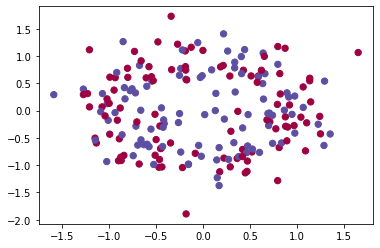

In [3]:
#plot dataset
plt.scatter(X1[0,:],X1[1,:],c=Y1,s=40,cmap=plt.cm.Spectral)



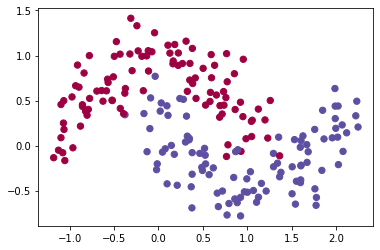

In [4]:
plt.scatter(X2[0,:],X2[1,:],c=Y2,s=40,cmap=plt.cm.Spectral)

In [5]:
m_train=X1.shape[1]
shape_X1=X1.shape
shape_Y1=Y1.shape
print(m_train)
print(X1.shape)
print(Y1.shape)

200
(2, 200)
(1, 200)


In [6]:
def layer_sizes(X1,Y1):
  n_x=X1.shape[0];
  n_y=Y1.shape[0];
  n_h=4;
  return (n_x,n_y,n_h)


In [7]:
def initialize_parameters(n_x,n_y,n_h):
  W1=np.random.randn(n_h,n_x)*0.01
  W2=np.random.randn(n_y,n_h)*0.01
  b1=np.zeros((n_h,1))
  b2=np.zeros((n_y,1))
  parameters={"W1":W1,"b1":b1,"W2":W2,"b2":b2}
  return parameters

In [8]:
def sigmoid(z):
  a=1/(1+np.exp(-z))
  return a

In [9]:
def forward_prop(X1,parameters):
  W1=parameters["W1"]
  W2=parameters["W2"]
  b1=parameters["b1"]
  b2=parameters["b2"]
  Z1=np.dot(W1,X1)+b1
  A1=np.tanh(Z1)
  Z2=np.dot(W2,A1)+b2
  A2=sigmoid(Z2)
  cache={"Z1":Z1,"A1":A1,"Z2":Z2,"A2":A2}
  return A2,cache


In [10]:
print(Y1.shape)

(1, 200)


In [11]:
def compute_cost(Y1,cache):
  A2=cache["A2"]
  m=Y1.shape[1]
  cost=(-1/m)*np.sum(np.dot(Y1,np.log(A2).T)+np.dot(1-Y1,np.log(1-A2).T))
  cost=float(np.squeeze(cost))
  return cost

In [12]:
def back_prop(X1,Y1,cache,parameters):
  m=Y1.shape[1]
  Z1=cache["Z1"]
  Z2=cache["Z2"]
  A1=cache["A1"]
  A2=cache["A2"]
  W2=parameters["W2"]
  dZ2=A2-Y1
  dW2=(1/m)*np.dot(dZ2,A1.T)
  db2=(1/m)*np.sum(dZ2,axis=1,keepdims=True)
  dZ1=np.dot(W2.T,dZ2)*(1-np.power(A1,2))
  dW1=(1/m)*np.dot(dZ1,X1.T)
  db1=(1/m)*np.sum(dZ1,axis=1,keepdims=True)
  grads={"dW1":dW1,"db1":db1,"dW2":dW2,"db2":db2}
  return grads

In [13]:
def update_params(parameters,grads,lr=1.2):
  W1=parameters["W1"]
  W2=parameters["W2"]
  b1=parameters["b1"]
  b2=parameters["b2"]
  dW1=grads["dW1"]
  dW2=grads["dW2"]
  db1=grads["db1"]
  db2=grads["db2"]
  W1=W1-lr*dW1
  W2=W2-lr*dW2
  b1=b1-lr*db1
  b2=b2-lr*db2
  parameters={"W1":W1,"b1":b1,"W2":W2,"b2":b2}
  return parameters

In [14]:

def nn_model(X1,Y1,n_h,num_itr=10000,print_cost=False):
  np.random.seed(3)
  n_x=layer_sizes(X1,Y1)[0]
  n_y=layer_sizes(X1,Y1)[1]
  parameters=initialize_parameters(n_x,n_y,n_h)
  for i in range(0,num_itr):
    A2,cache=forward_prop(X1,parameters)
    cost=compute_cost(Y1,cache)
    grads=back_prop(X1,Y1,cache,parameters)
    parameters=update_params(parameters,grads)
    if print_cost and i%1000==0:
      print("Cost after iteration %i: %f" %(i, cost))
  return parameters

In [15]:
def predict(parameters,X1):
  A2,cache=forward_prop(X1,parameters)
  predictions=(A2>0.5)
  return predictions

In [40]:
parameters = nn_model(X1, Y1, n_h = 4, num_itr = 10000, print_cost=True)


Cost after iteration 0: 0.693148
Cost after iteration 1000: 0.692941
Cost after iteration 2000: 0.677902
Cost after iteration 3000: 0.632916
Cost after iteration 4000: 0.629960
Cost after iteration 5000: 0.628509
Cost after iteration 6000: 0.627536
Cost after iteration 7000: 0.626187
Cost after iteration 8000: 0.621291
Cost after iteration 9000: 0.619280


In [43]:
# decision boundary function
def decision_boundary(model,X,Y):
  #make values like linspace from max to min
  x_min,x_max=X[0,:].min()-1,X[0,:].max()+1
  y_min,y_max=X[1,:].min()-1,X[1,:].max()+1
  # print("X.shape: ",X.shape)
  # print("Y.shape: ",Y.shape)
  # #add some dist between the grid points
  h=0.01
  #create a mesh grid
  xx,yy=np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))
  #print("xx.shape: ",xx.shape)
  #print("yy.shape: ",yy.shape)
  #ravel is used to flatten the array from multidimensional
  #np.c_[xx.ravel(),yy.ravel()] results an array with some lines and 2 features
  Z=model(np.c_[xx.ravel(),yy.ravel()])
  var=np.c_[xx.ravel(),yy.ravel()]
  # print("np.c_[].shape",var.shape)
  # print("xx.ravel().shape",xx.ravel().shape)
  # print("yy.ravel().shape",yy.ravel().shape)
  # print("Z.shape: ",Z.shape)
  # #Z should have the same dim as xx and yy.
  Z=Z.reshape(xx.shape)
  #print("Z.shape 2: ",Z.shape)
  #contour and contourf draw contour lines and filled contours, respectively
  #Z is the height for the coordinate xx,yy
  plt.contourf(xx,yy,Z,cmap=plt.cm.Spectral)
  plt.ylabel('x2')
  plt.xlabel('x1')
  # s- marker size (can be scalar or array of size equal to size of x or y)
  # c- color of sequence of colors for markers
  plt.scatter(X[0,:],X[1,:],c=Y,cmap=plt.cm.Spectral)

X.shape:  (2, 200)
Y.shape:  (1, 200)
xx.shape:  (563, 524)
yy.shape:  (563, 524)
np.c_[].shape (295012, 2)
xx.ravel().shape (295012,)
yy.ravel().shape (295012,)
Z.shape:  (1, 295012)
Z.shape 2:  (563, 524)


Text(0.5, 1.0, 'Decision Boundary for hidden layer of size 4')

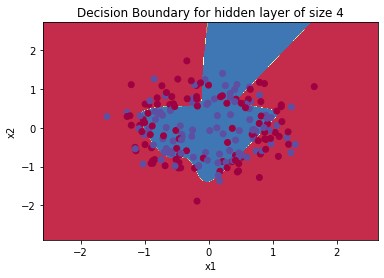

In [25]:
#decision boundary
decision_boundary(lambda x:predict(parameters,x.T),X1,Y1)
plt.title("Decision Boundary for hidden layer of size "+str(4))

In [39]:
#print accuracy
predictions=predict(parameters,X1)
print("train accuracy: {}%".format(100-np.mean(np.abs(Y1-predictions)*100)))
print ('Accuracy: %d' % float((np.dot(Y1, predictions.T) + np.dot(1 - Y1, 1 - predictions.T)) / float(Y1.size) * 100) + '%')       

train accuracy: 66.5%
Accuracy: 66%


Accuracy for 1 hidden units: 54.0 %
Accuracy for 2 hidden units: 60.0 %
Accuracy for 4 hidden units: 68.0 %
Accuracy for 5 hidden units: 68.5 %
Accuracy for 20 hidden units: 66.5 %
Accuracy for 50 hidden units: 64.5 %


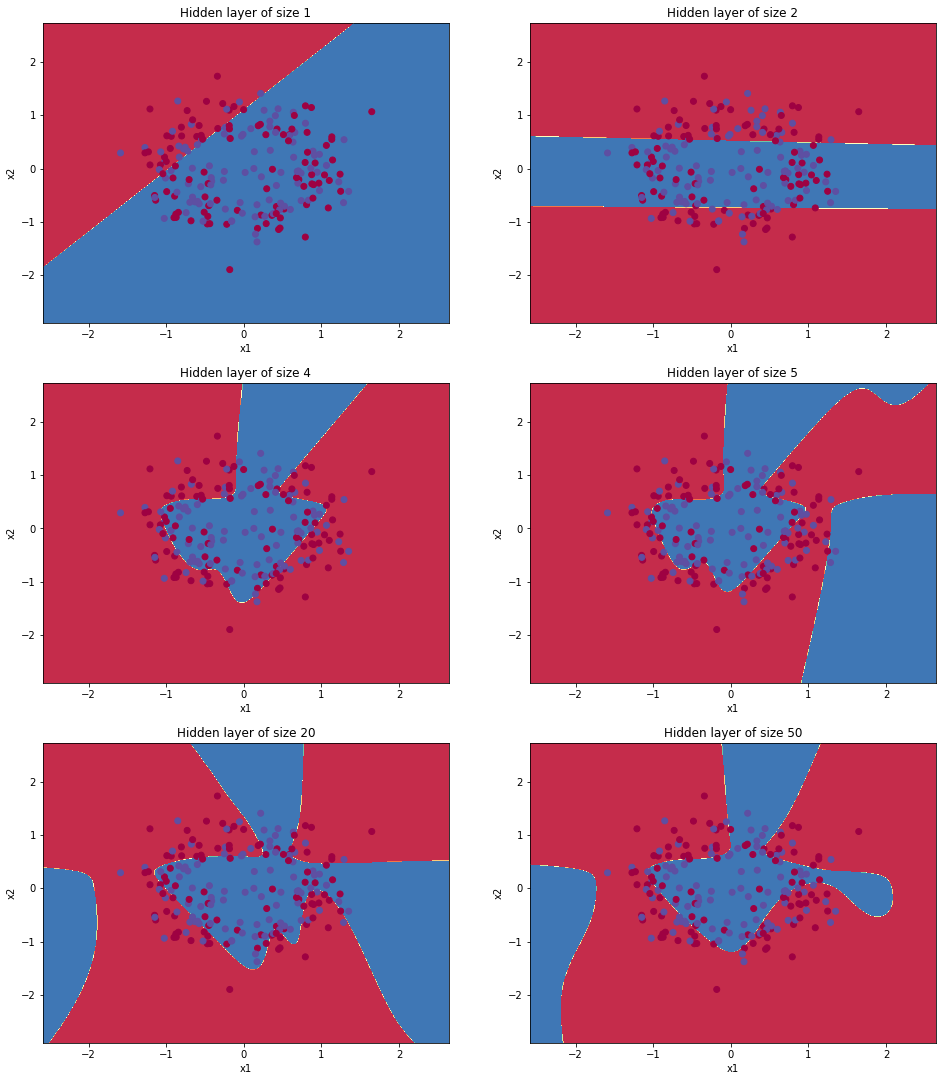

In [44]:
#tune the hidden layers
plt.figure(figsize=(16,32))
hd_l_sizes=[1,2,4,5,20,50]
for i,nh in enumerate(hd_l_sizes):
  plt.subplot(5,2,i+1)
  plt.title("Hidden layer of size %d" %nh)
  parameters = nn_model(X1, Y1, nh, num_itr = 10000, print_cost=False)
  decision_boundary(lambda x:predict(parameters,x.T),X1,Y1)
  predictions=predict(parameters,X1)
  accuracy=float((np.dot(Y1,predictions.T)+np.dot(1-Y1,1-predictions.T))/float(Y1.size)*100)
  print("Accuracy for {} hidden units: {} %".format(nh,accuracy))

Accuracy for 1 hidden units: 71.5 %
Accuracy for 2 hidden units: 74.5 %
Accuracy for 4 hidden units: 47.5 %
Accuracy for 5 hidden units: 69.5 %
Accuracy for 20 hidden units: 65.5 %
Accuracy for 50 hidden units: 55.00000000000001 %


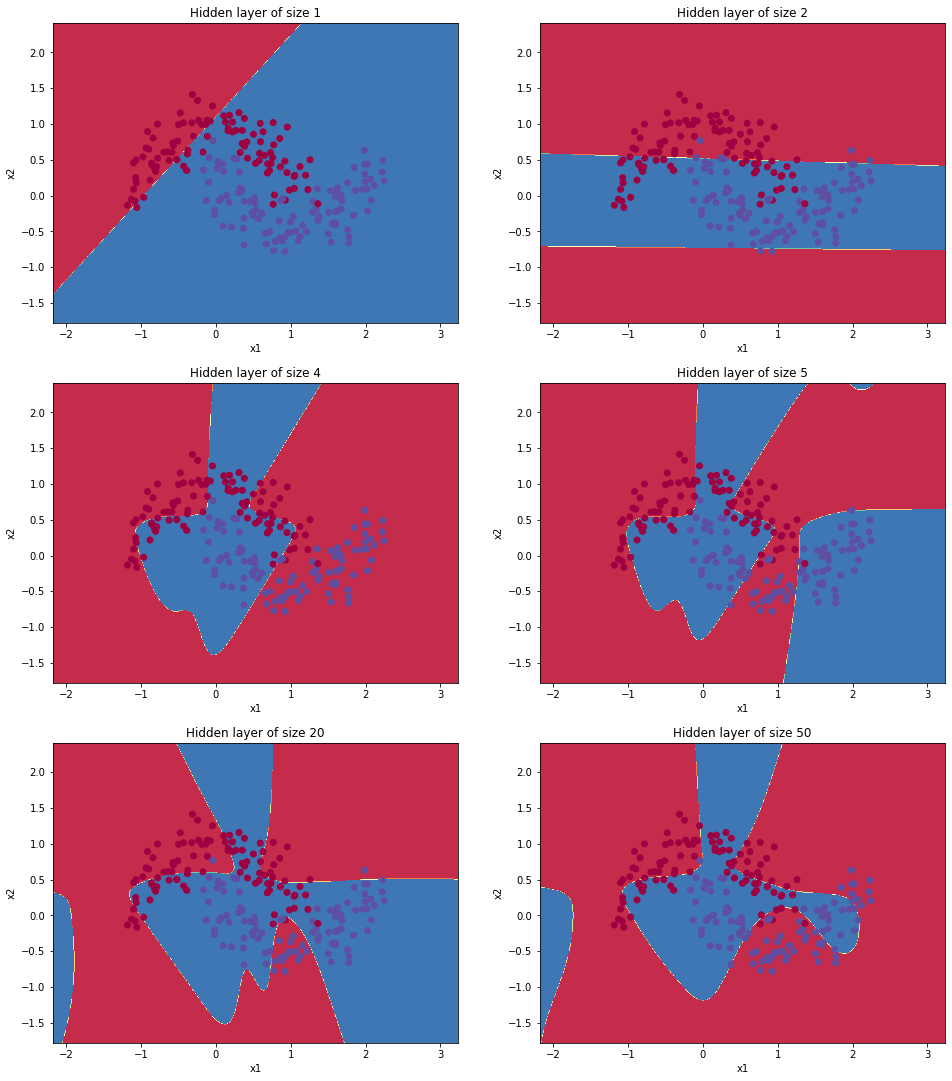

In [46]:
#use the parameters trained on noisy circles to work on noisy moons
#tune the hidden layerss
plt.figure(figsize=(16,32))
hd_l_sizes=[1,2,4,5,20,50]
for i,nh in enumerate(hd_l_sizes):
  plt.subplot(5,2,i+1)
  plt.title("Hidden layer of size %d" %nh)
  parameters = nn_model(X1, Y1, nh, num_itr = 10000, print_cost=False)
  decision_boundary(lambda x:predict(parameters,x.T),X2,Y2)
  predictions=predict(parameters,X2)
  accuracy=float((np.dot(Y2,predictions.T)+np.dot(1-Y2,1-predictions.T))/float(Y2.size)*100)
  print("Accuracy for {} hidden units: {} %".format(nh,accuracy))

In [47]:
clf=sklearn.linear_model.LogisticRegressionCV();
clf.fit(X1.T,Y1.T);

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of logistic regression: 51 


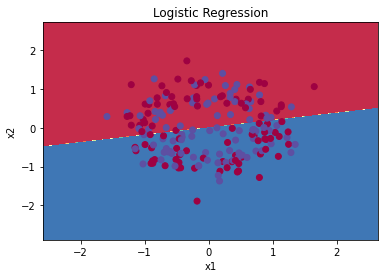

In [49]:
decision_boundary(lambda x: clf.predict(x), X1, Y1)
plt.title("Logistic Regression")

# Print accuracy
LR_predictions = clf.predict(X1.T)
print ('Accuracy of logistic regression: %d ' 
       % float((np.dot(Y1,LR_predictions) + np.dot(1-Y1,1-LR_predictions))/
               float(Y1.size)*100))
